ChEn-3170: Computational Methods in Chemical Engineering Spring 2020 UMass Lowell; Prof. V. F. de Almeida **23Mar20**

# Laboratory Work 08 (24Mar20) Session 802
$
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Cmtrx}{\boldsymbol{\mathsf{C}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Qmtrx}{\boldsymbol{\mathsf{Q}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\yvec}{\boldsymbol{\mathsf{y}}}
  \newcommand{\zvec}{\boldsymbol{\mathsf{z}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \DeclareMathOperator{\rank}{rank}
  \DeclareMathOperator{\abs}{abs}
$

### Name: `your name`

### Rubric for each assignment: 

|      Context          |  Points |
| -----------------------     | ------- |
| Precision of the answer     |   80%   |
| Answer Markdown readability |   10%   |
| Code readability            |   10%   |
    

### <span style="color:red">Guidance:</span>
 +  <span style="color:red"> 
    Save your work frequently to a file locally to your computer.
    </span>
 +  <span style="color:red">
    Before submitting, `Kernel` -> `Restart & Run All`, to verify your notebook runs correctly.
    </span>
 +  <span style="color:red">
    Save your file again.
    </span>

---
### Table of Contents
* [Assignment 1 (100 pts)](#a1) Reaction rates for silicon vapor deposition.
 - [1.1)](#a11) Import reaction mechanism.
 - [1.2)](#a12) Species and stoichiometric data.
 - [1.3)](#a13) Compute rank.
 - [1.4)](#a14) Compute reaction rates for given production rates; explain.
 - [1.5)](#a15) Provide a production rate vector that allows for an infinite number of reaction rates, and compute a unique one.
 ---

## <span style="color:blue">Assignment 1 (100 pts): For each item below respond in a separate notebook cell.</span> </span><a id="a1"></a>

<span style="color:blue">
1.1)
Import the following reaction mechanism for silicon vapor deposition from the course repository <b>`data/silicon-rxn.txt`</b> and display the reactions.
</span>
</span><a id="a11"></a>

In [1]:
'''1.1 Import reaction mechanism'''


r0 :  SiH4 <=> SiH2 + H2
r1 :  SiH4 <=> SiH3 + H
r2 :  SiH4 + SiH2 <=> Si2H6
r3 :  Si2H4 + H2 <=> SiH4 + SiH2
r4 :  SiH4 + H <=> SiH3 + H2
r5 :  SiH4 + SiH3 <=> Si2H5 + H2
r6 :  SiH4 + SiH <=> SiH3 + SiH2
r7 :  SiH4 + SiH <=> Si2H5
r8 :  SiH4 + Si <=> 2 SiH2
r9 :  Si + H2 <=> SiH2
r10 :  SiH2 + SiH <=> Si2H3
r11 :  SiH2 + Si <=> Si2H2
r12 :  SiH2 + Si3 <=> Si2H2 + Si2
r13 :  H2 + Si2H2 <=> Si2H4
r14 :  H2 + Si2H4 <=> Si2H6
r15 :  H2 + SiH <=> SiH3
r16 :  H2 + Si2 <=> Si2H2
r17 :  H2 + Si2H3 <=> Si2H5
r18 :  Si2H2 + H <=> Si2H3
r19 :  Si + Si3 <=> 2 Si2
n_reactions = 20


<span style="color:blue">
1.2) Make an organized output of the species and stoichiometric data.
</span><a id="a12"></a>

['Si2H5', 'SiH4', 'Si2', 'Si2H2', 'SiH2', 'Si3', 'SiH', 'Si2H4', 'Si', 'Si2H3', 'SiH3', 'H2', 'H', 'Si2H6']
# species = 14

s_mtrx =
 [[ 0. -1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.]
 [ 0. -1.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  1.  0.  0.  1.  0.  0. -1.  0.  0.  0. -1.  0.  0.]
 [ 0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1. -1.  0.]
 [ 1. -1.  0.  0.  0.  0.  0.  0.  0.  0. -1.  1.  0.  0.]
 [ 0. -1.  0.  0.  1.  0. -1.  0.  0.  0.  1.  0.  0.  0.]
 [ 1. -1.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  2.  0.  0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0. -1.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0. -1.  0. -1.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -1.  0.  0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  1. -1. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  0.  1.  0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  0.  0

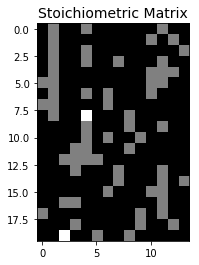

In [3]:
'''1.2 Species and stoichiometric data'''


<span style="color:blue">
1.3) Compute the rank of the stoichiometric matrix using your own algorithm.
</span><a id="a13"></a>

In [4]:
'''1.3 Compute rank'''


rank(S) = 12


<span style="color:blue">
1.4) Given the following productions rate vector [mol/(s cc)],
    
$\gvec = \begin{pmatrix}
 -2.772 \\
 1.35 \\
 0.692 \\
 -2.37 \\
 -2.266 \\
 -2.476 \\
 0.124  \\
 -1.486 \\
 -0.553 \\
 1.538 \\
 -1.407 \\
 -2.66 \\
 -0.831 \\
 -0.682
 \end{pmatrix}
$
 
 for the species: 

    SiH, SiH2, Si3, SiH4, Si2H3, Si2, SiH3, Si2H5, H2, H, Si2H4, Si, Si2H2, Si2H6,
    
compute a reaction rates vector and make a plot. Use your own algorithms and explain your work, that is, what is the meaning of your computed reaction rate vector? What problem are you solving to obtain the reaction rate vector from the given production rate vector? Do the production rate equations have a solution?
</span>
</span><a id="a14"></a>

In [8]:
'''1.4 Compute a reaction rates vector'''


species ['Si2H5', 'SiH4', 'Si2', 'Si2H2', 'SiH2', 'Si3', 'SiH', 'Si2H4', 'Si', 'Si2H3', 'SiH3', 'H2', 'H', 'Si2H6']
species production rates g_vec = [-1.486 -2.37  -2.476 -0.831  1.35   0.692 -2.772 -1.407 -2.66  -2.266
  0.124 -0.553  1.538 -0.682]
reaction rates r_vec= [ 0.083 -0.449  0.589 -0.406 -0.51  -0.342  0.775  0.35   0.662  0.579
  0.386  1.236 -1.853 -0.335  0.183  0.692 -0.968 -0.12  -1.556 -0.306]
   ||r|| = 3.435e+00


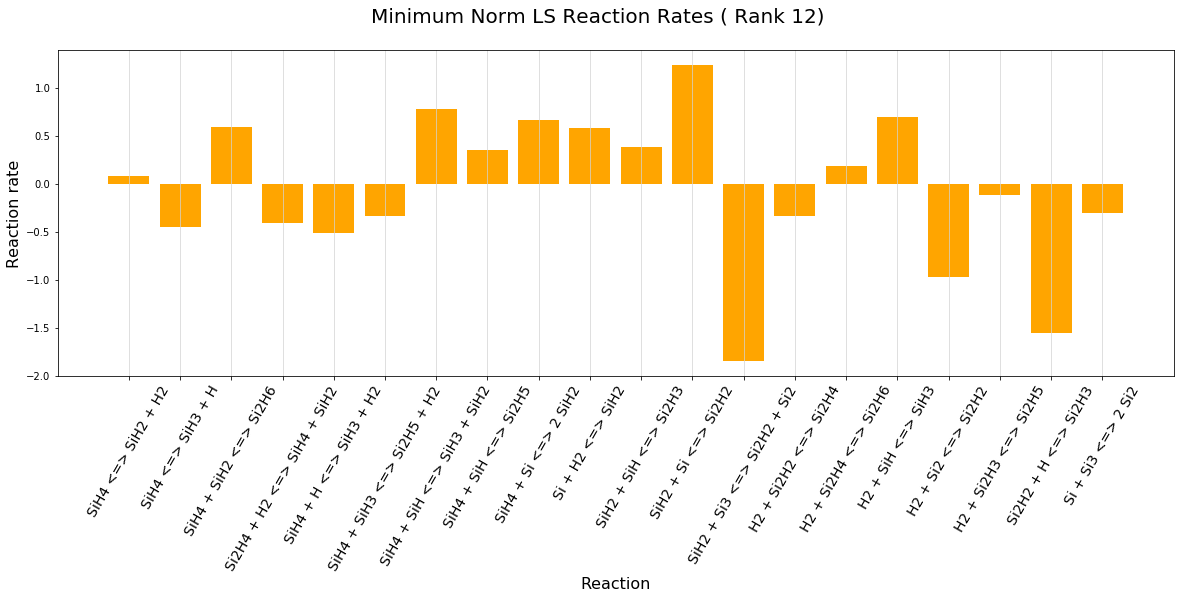

In [9]:
'''1.4 Plot of reaction rates'''


**Meaning of the computed reaction rates vector:** 

<span style="color:blue">
1.5) Find a production rate vector $\gvec$ for which the problem 

\begin{equation*}
\Smtrx^\top\,\rvec = \gvec
\end{equation*}

has an infinite number of solutions, and compute a unique solution from this infinite set.
</span>
</span><a id="a15"></a>

In [13]:
'''1.5 Find production rates for unique reaction rates'''


reaction rates r_vec= [-0.122 -0.845 -0.535  0.848 -0.059 -0.158 -0.231 -0.267  0.701  0.823
  0.013  0.282 -0.504 -0.186  0.313 -0.109  0.008 -0.158  0.725  0.31 ]
   ||r|| = 2.045e+00
||g - ST r||                 = 9.13539e-09
